### Theory

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx = None,resolution=0.02):
    #setup marker generator and color map
    
    
    markers = ('s','x','o','^','v')
    
    colors = ('red','blue','lightgreen','gray','cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1, X[:,0].max()+1
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot class samples
    for idx,c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0],y=X[y==c1,1], alpha=0.8,c = cmap(idx),marker=markers[idx],label=c1)
        
    #highlight test samples
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0,linewidth=1,marker='o',s=55,label='test set')

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.cross_validation import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

/home/deepak/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Code

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


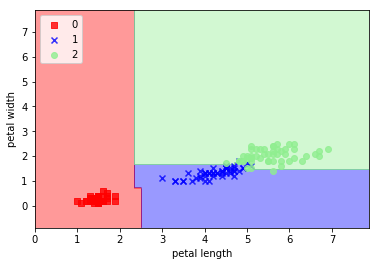

In [15]:
'''Conveniently, we dont have to construct the random forest classifier from individual decision trees by 
 ourselves, there is already an implementation in scikit-learn.'''

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=1,n_jobs=2)
#n_estimators -> number of decision trees
#entropy is the impurity measure to split the nodes
#n_jobs -> how many cores to use to train the model

forest.fit(X_train,y_train)

plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=None)#range(105,150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

